In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.**

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [10]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [11]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [12]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [13]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [14]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

Стандартизация

3.0


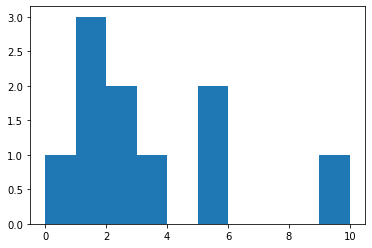

In [15]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


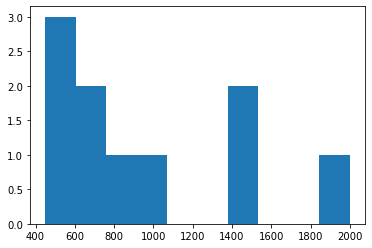

In [16]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [17]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [18]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


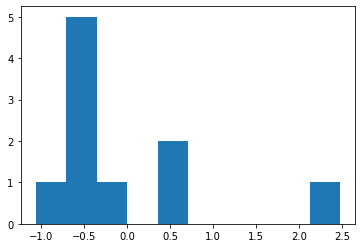

In [19]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17
0.9999999999999999


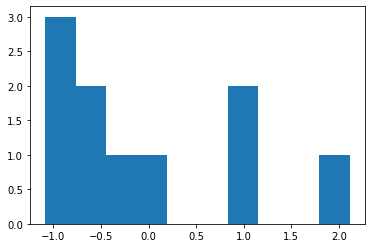

In [20]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

SGD (Stochastic gradient descent)

In [21]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [22]:
W = np.random.randn(X.shape[1])
W

array([-0.02650573,  0.15346093,  0.14920804,  0.17750155])

In [60]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        plt.plot(W,  color='r') # ------ добавила график --------
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

Iter: 0, weights: [-1.53617835 -0.6317828  -0.39080617  0.11599171], error 3704.4418658032955
Iter: 500, weights: [56.49761912  5.91476714  1.0792115   5.47320481], error 25.257745812088338
Iter: 1000, weights: [56.4999999   6.19335853  0.1509073   6.15719187], error 24.949828878058604
Iter: 1500, weights: [56.5         6.26513239 -0.1742747   6.42138749], error 24.910474778124968
Iter: 2000, weights: [56.5         6.28950836 -0.2908631   6.51740351], error 24.905377551633283
Iter: 2500, weights: [56.5         6.29820766 -0.33280467  6.5520108 ], error 24.904717169223517
Iter: 3000, weights: [56.5         6.30133509 -0.34789999  6.56446981], error 24.904631611456974
Iter: 3500, weights: [56.5         6.30246058 -0.35333336  6.56895445], error 24.904620526770106
Iter: 4000, weights: [56.5         6.30286568 -0.35528905  6.57056866], error 24.904619090661047
Iter: 4500, weights: [56.5         6.30301149 -0.35599299  6.57114968], error 24.904618904601755
Final MSE: 24.904618880496276


array([56.5       ,  6.30306392, -0.35624607,  6.57135858])

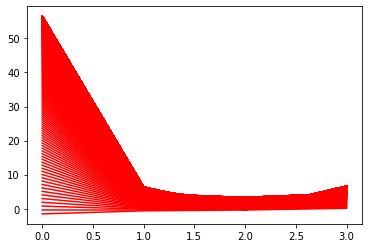

In [61]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

In [25]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            err = calc_mse(y, np.dot(X, W))
            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [26]:
stohastic_gradient_descent(X_st, y, iterations=5000, batch_size=4, eta=1e-2)

amount of batches is 3
Iter: 0, weights: [ 3.69009028 -1.20851528  0.61771249  3.08868872], error 2996.6039228741997
Iter: 500, weights: [57.05897297  6.07937783 -0.78138472  6.96540075], error 25.240296032232905
Iter: 1000, weights: [57.05293438  6.12322216 -0.96299314  7.11275209], error 25.26436424381511
Iter: 1500, weights: [57.05250194  6.12622053 -0.97581676  7.12324782], error 25.26652547868367
Iter: 2000, weights: [57.05247133  6.12643272 -0.97672439  7.12399072], error 25.266680664071284
Iter: 2500, weights: [57.05246917  6.12644773 -0.97678863  7.1240433 ], error 25.266691658996542
Iter: 3000, weights: [57.05246901  6.1264488  -0.97679318  7.12404702], error 25.266692437260563
Iter: 3500, weights: [57.052469    6.12644887 -0.9767935   7.12404728], error 25.26669249234551
Iter: 4000, weights: [57.052469    6.12644888 -0.97679352  7.1240473 ], error 25.266692496244374
Iter: 4500, weights: [57.052469    6.12644888 -0.97679352  7.1240473 ], error 25.266692496520317
Final MSE: 25.

array([57.052469  ,  6.12644888, -0.97679353,  7.1240473 ])

##### L1 регуляризация

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$
Про производную можно посмотреть [здесь](https://youtu.be/dHhYHGI9E6I).

##### L2 регуляризация

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = 2\lambda w $$

In [45]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [46]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 1.65719461 -0.787959   -0.10504101 -1.02890129], error 3356.4149339134274
Iter: 500, weights: [56.49492653  5.87607825  1.3382116   5.24493915], error 25.399974383122895
Iter: 1000, weights: [56.49717505  6.17396849  0.24670445  6.07745491], error 24.968635129069977
Iter: 1500, weights: [56.49717514  6.25743805 -0.13853298  6.3919289 ], error 24.913009014334072
Iter: 2000, weights: [56.49717514  6.28625511 -0.27674576  6.5058299 ], error 24.905747698595988
Iter: 2500, weights: [56.49717514  6.29656038 -0.3264499   6.54684622], error 24.904785302675172
Iter: 3000, weights: [56.49717514  6.30026465 -0.34433052  6.56160431], error 24.904652617145707
Iter: 3500, weights: [56.49717514  6.30159714 -0.35076323  6.5669138 ], error 24.90463252100175
Iter: 4000, weights: [56.49717514  6.30207651 -0.35307746  6.56882395], error 24.904628868445947
Iter: 4500, weights: [56.49717514  6.30224897 -0.35391003  6.56951115], error 24.904628017395698
Final MSE: 24.904627771145737


array([56.49717514,  6.30231094, -0.35420922,  6.56975809])

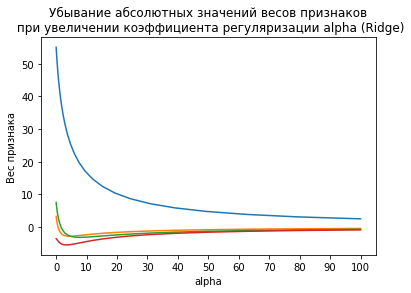

In [43]:
# ------  добавим визуализацию  --------

from sklearn.linear_model import Ridge

n = 50

train_amount = 5
train_X = X_st[:train_amount]
train_y = y[:train_amount]
test_X = X_st[train_amount:]
test_y = y[train_amount:]


coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(train_X, train_y)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

Iter: 0, weights: [-0.24889165  1.7521042   0.61705603  0.93003616], error 3460.1003633307446
Iter: 500, weights: [56.49767193  5.97466397  1.02958974  5.46688638], error 25.23820106652543
Iter: 1000, weights: [56.4999999   6.19853084  0.13819385  6.16526647], error 24.947724897020727
Iter: 1500, weights: [56.5         6.26615563 -0.17858742  6.4248234 ], error 24.910203311693092
Iter: 2000, weights: [56.5         6.28983376 -0.29240195  6.51866733], error 24.905342383939953
Iter: 2500, weights: [56.5         6.29832259 -0.33335788  6.55246708], error 24.904712612977747
Iter: 3000, weights: [56.5         6.30137634 -0.34809908  6.56463411], error 24.90463102115924
Iter: 3500, weights: [56.5         6.30247542 -0.35340502  6.56901359], error 24.904620450292363
Iter: 4000, weights: [56.5         6.30287102 -0.35531484  6.57058995], error 24.90461908075276
Iter: 4500, weights: [56.5         6.30301342 -0.35600227  6.57115735], error 24.90461890331804
Final MSE: 24.904618880329966


array([56.5       ,  6.30306461, -0.35624942,  6.57136134])

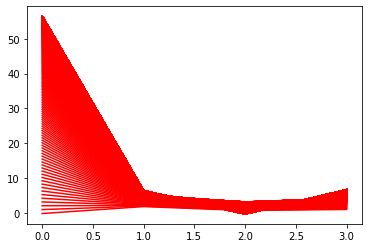

In [62]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Веса изменяются примерно одинаково

**2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

In [69]:
#  ------- функция ------
def gradient_descent_reg_l1(X, y, iterations, learning_rate, l1):
#     n - размерность
#     learning_rate - коэф-т обучения
#     l1 - значение срока регуляризации
#     iterations - кол-во наблюдений
         
    err_list = []    
         
    W = np.random.randn(X.shape[1]) / np.sqrt(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        delta = y_pred - y
        W -= learning_rate*(X.T.dot(delta) + l1*np.sign(W))
        mse = delta.dot(delta) / n
        err_list.append(mse)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {mse}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [71]:
#  ---- проверка -----
gradient_descent_reg_l1(X_st, y, iterations=5000, learning_rate=1e-2, l1=10)

Iter: 0, weights: [5.79990065 1.42119342 0.8595286  1.17018964], error 3317.0163430971006
Iter: 500, weights: [55.5         5.58593424  0.10272389  5.68691023], error 27.062543130726567
Iter: 1000, weights: [55.5         5.60511506  0.16682644  5.70932362], error 26.815671730851413
Iter: 1500, weights: [5.55000000e+01 5.61085621e+00 9.11235545e-03 5.71467635e+00], error 27.156618370909012
Iter: 2000, weights: [5.55000000e+01 5.60090884e+00 3.28549828e-02 5.70272645e+00], error 27.155272851064147
Iter: 2500, weights: [55.5         5.59151334  0.05834898  5.69160208], error 27.145886238345696
Iter: 3000, weights: [55.5         5.5855727   0.09236423  5.68602543], error 27.091274182413088
Iter: 3500, weights: [55.5         5.59612792  0.14662711  5.69907947], error 26.90424491711285
Iter: 4000, weights: [5.55000000e+01 5.61312583e+00 3.94506892e-03 5.71748070e+00], error 27.156090085447897
Iter: 4500, weights: [5.55000000e+01 5.60290783e+00 2.74265922e-02 5.70531480e+00], error 27.1567099

array([55.5       ,  5.59146461,  0.06102916,  5.69244165])

**3*. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

*Нет, будет применен только один из двух методов - тот что ниже*

**4*. Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.**

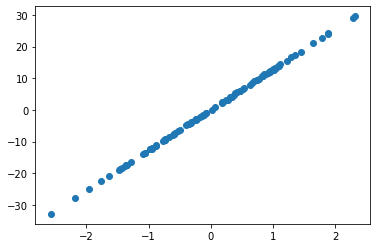

In [77]:
from sklearn.datasets import make_regression

# generate regression dataset
X_new, y_new = make_regression(n_samples=100, n_features=1, noise=0.1)
# plot regression dataset
pyplot.scatter(X_new,y_new)
pyplot.show()

In [81]:
stohastic_gradient_descent(X_new, y_new, iterations=20, batch_size=4, eta=1e-2)

amount of batches is 25
Iter: 0, weights: [4.63515715], error 71.59261025731448
Iter: 2, weights: [9.90099831], error 9.035654951139133
Iter: 4, weights: [11.77160203], error 1.1468954082380056
Iter: 6, weights: [12.43610332], error 0.15330957848120916
Iter: 8, weights: [12.67215651], error 0.028604415189867925
Iter: 10, weights: [12.75601053], error 0.013108014922052586
Iter: 12, weights: [12.7857983], error 0.01123785773318011
Iter: 14, weights: [12.79637992], error 0.011032179256977102
Iter: 16, weights: [12.80013886], error 0.011016994604028572
Iter: 18, weights: [12.80147416], error 0.011018904340719672
Final MSE: 0.011018906056286052


array([12.80177137])

In [82]:
from sklearn.linear_model import LinearRegression

# создадим модель
linear_regressor = LinearRegression()

# обучим ее
linear_regressor.fit(np.reshape(X_new, (-1, 1)), y_new)

LinearRegression()

In [83]:
# выведем полученный вес при признаке и свободный коэффициент
print(linear_regressor.coef_[0], linear_regressor.intercept_)

12.800386387831832 0.004138641611542725


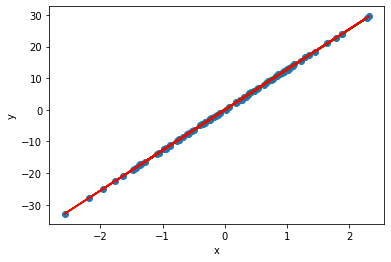

In [84]:
plt.xlabel('x')
plt.ylabel('y')
# plt.ylim(-5000, 5000)
# plt.xlim(-10,10)

plt.plot(X_new, y_new, color='g')
plt.scatter(X_new, y_new)
plt.plot(X_new, linear_regressor.predict(np.reshape(X_new, (-1, 1))), color='r');